In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


from sklearn.metrics import mean_squared_error


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet('yellow_tripdata_2023-01.parquet')

In [4]:
df.shape

(3066766, 19)

In [5]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [6]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [7]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50


In [8]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)


In [9]:
pd.options.display.float_format = '{:.2f}'.format

In [10]:
df.duration.describe()


count   3066766.00
mean         15.67
std          42.59
min         -29.20
25%           7.12
50%          11.52
75%          18.30
max       10029.18
Name: duration, dtype: float64

In [11]:
dff = df[(df.duration >= 1) & (df.duration <= 60)]

In [12]:
dff.shape[0]/df.shape[0]

0.9812202822125979

In [13]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [14]:
dff[categorical] = dff[categorical].astype(str)


/var/folders/qc/ydpss6296zq5rzwvy14_dn480000gn/T/ipykernel_47578/205091459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[categorical] = dff[categorical].astype(str)


In [15]:
dff

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.00,0.97,1.00,N,161,141,2,9.30,1.00,0.50,0.00,0.00,1.00,14.30,2.50,0.00,8.43
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.00,1.10,1.00,N,43,237,1,7.90,1.00,0.50,4.00,0.00,1.00,16.90,2.50,0.00,6.32
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.00,2.51,1.00,N,48,238,1,14.90,1.00,0.50,15.00,0.00,1.00,34.90,2.50,0.00,12.75
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.00,1.90,1.00,N,138,7,1,12.10,7.25,0.50,0.00,0.00,1.00,20.85,0.00,1.25,9.62
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.00,1.43,1.00,N,107,79,1,11.40,1.00,0.50,3.28,0.00,1.00,19.68,2.50,0.00,10.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.50,3.96,0.00,1.00,23.76,NaN,NaN,13.98
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.50,2.64,0.00,1.00,29.07,NaN,NaN,19.45
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.50,5.32,0.00,1.00,26.93,NaN,NaN,24.52
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.50,4.43,0.00,1.00,26.58,NaN,NaN,13.00


In [16]:
train_dicts = dff[categorical + numerical].to_dict(orient='records')


In [17]:
dv = DictVectorizer()


In [18]:
X_train = dv.fit_transform(train_dicts)

In [19]:
target = 'duration'
y_train = dff[target].values

In [20]:
X_train.shape

(3009173, 516)

In [21]:
X_train

<3009173x516 sparse matrix of type '<class 'numpy.float64'>'
	with 9027519 stored elements in Compressed Sparse Row format>

In [22]:
y_train.shape

(3009173,)

In [23]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_train)


In [26]:

rmse = mean_squared_error(y_train, y_pred, squared=False)
rmse

7.658406384438273

/Users/chrkrg/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chrkrg/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


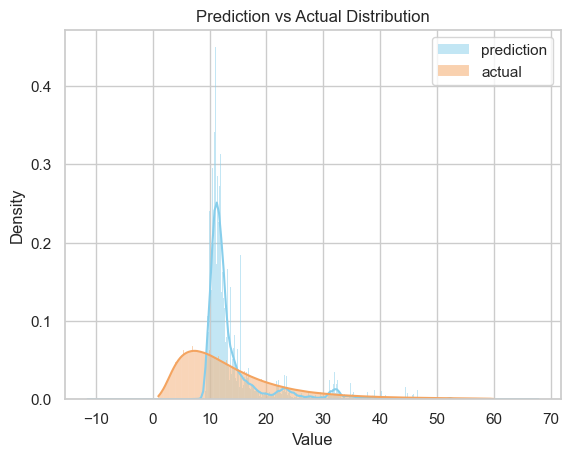

In [27]:
sns.set(style="whitegrid")

# Plot prediction distribution
sns.histplot(y_pred, kde=True, stat="density", label="prediction",
             color="skyblue", alpha=0.5, edgecolor=None)

# Plot actual distribution
sns.histplot(y_train, kde=True, stat="density", label="actual",
             color="sandybrown", alpha=0.5, edgecolor=None)

# Final touches
plt.legend()
plt.title("Prediction vs Actual Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

/Users/chrkrg/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chrkrg/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


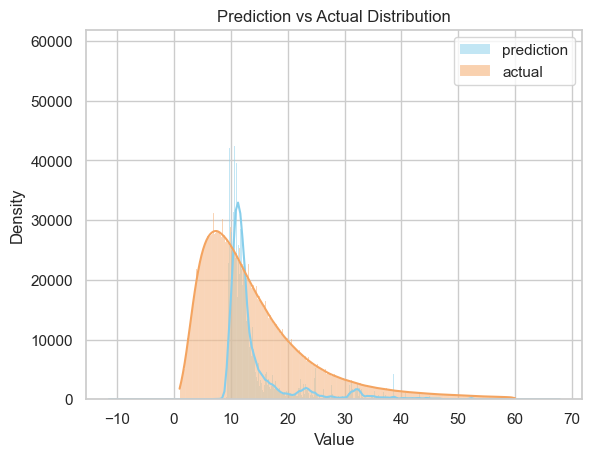

In [28]:
sns.set(style="whitegrid")

# Plot prediction distribution
sns.histplot(y_pred, kde=True, label="prediction",
             color="skyblue", alpha=0.5, edgecolor=None)

# Plot actual distribution
sns.histplot(y_train, kde=True, label="actual",
             color="sandybrown", alpha=0.5, edgecolor=None)

# Final touches
plt.legend()
plt.title("Prediction vs Actual Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [29]:
df_val = pd.read_parquet('yellow_tripdata_2023-02.parquet')

In [30]:
df_val.shape

(2913955, 19)

In [31]:
df_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.00,0.30,1.00,N,142,163,2,4.40,3.50,0.50,0.00,0.00,1.00,9.40,2.50,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.00,0.00,1.00,N,71,71,4,-3.00,-1.00,-0.50,0.00,0.00,-1.00,-5.50,0.00,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.00,0.00,1.00,N,71,71,4,3.00,1.00,0.50,0.00,0.00,1.00,5.50,0.00,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.00,18.80,1.00,N,132,26,1,70.90,2.25,0.50,0.00,0.00,1.00,74.65,0.00,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.00,3.22,1.00,N,161,145,1,17.00,1.00,0.50,3.30,0.00,1.00,25.30,2.50,0.00


In [32]:
df_val['duration'] = df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime

In [33]:
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)


In [34]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')


In [35]:
X_val = dv.transform(val_dicts)


In [36]:
y_val = df_val[target].values

In [37]:
val_pred = lr.predict(X_val)

In [38]:
mean_squared_error(y_val,val_pred, squared=False)

43.24399707694749

In [42]:
lr = Lasso(0.001)
lr.fit(X_train, y_train)



Lasso(alpha=0.001)

In [43]:
y_pred = lr.predict(X_val)



In [44]:
print(mean_squared_error(y_pred,val_pred, squared=False))

3.645189317980397
